In [101]:
 import tensorflow as tf
 import numpy as np
 from sklearn import datasets
 from sklearn.utils import shuffle
 from sklearn.preprocessing import MinMaxScaler
 from tensorflow import keras

#### 1.
#### Carga el conjunto de datos IRIS. Puedes copiar el código de la carga del dataset de una práctica anterior. En la variable X carga la longitud de sépalo y de pétalo de las 100 primeras muestras (setosa y versicolor) y en la variable Y carga las etiquetas de clase verdaderas, siendo un 0 para setosa y un 1 para versicolor. Mezcla el conjunto de datos y normaliza sus características.

In [102]:
# Cargar dataset iris de sklearn
iris = datasets.load_iris()
X_all = iris.data       
y_all = iris.target 

In [103]:
# Filtrar solo setosa y versicolor
X = X_all[:100, [0, 2]]  # longitud sépalo y longitud pétalo
Y = y_all[:100]

In [104]:
# Mezclar datos
X, Y = shuffle(X, Y, random_state=0)

In [105]:
# Normalizar
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

#### 2.
#### Basándote en el ejemplo de la práctica 5.1, construye con keras, una RNA secuencial con las siguientes capas:
- Una capa oculta de 2 neuronas [con capa de entrada, input_shape=(2,)]
- Una capa de salida de 1 neurona con activación sigmoide activation='sigmoid':

Piensa en la implicación de todo ello. ¿Qué forma deben tener los datos de entrada a la RNA? ¿Qué forma
debe tener la salida de la RNA?

#### Respuesta:
- Al usar dos características, los datos de entrada deben tener dos columnas, una por cada característica.
- En cuanto a la salida, debe indicar la clase de una flor con un número.

In [106]:
model = tf.keras.Sequential([
    keras.layers.Dense(2, input_shape=(2,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')                   
])


c:\Users\Eurobeater\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 3.
#### Compila el modelo con el optimizador del descenso de gradiente estocástico y función de coste el error cuadrático medio. Muestra el resumen de sus parámetros.


In [107]:
model.compile(optimizer='sgd', loss='mean_squared_error')
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

#### 4.
#### Entrena el conjunto de datos con el método fit de tu RNA keras y observa el resultado ¿Crees que el modelo converge? Prueba varias veces con 10, 100 y 1000 épocas. Examina los resultados.

#### Muestra los límites de la decisión con la función plot_decision_regions. Ten en cuenta que la función predict devuelve un número entre 0 y 1. Observa la variable Z mediante un punto de ruptura: ¿Qué tienes que cambiar en la función plot_decision_regions para que funcione?

#### Respuesta:
- Con 10 épocas, no ha aprendido bien. Con 100 distingue clases y con 1000 el modelo converge, porque la pérdida baja mucho.
- He usado un punto de ruptura de 0.5. Si la predicción es mayor que 0,5, se considera clase 1. Si es menor o igual a 0,5 se le asigna a la clase 0.

In [108]:
# Entrenar el modelo con 10 épocas
model.fit(X, Y, epochs=10, verbose=1)

Epoch 1/10


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2761  
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2780 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2777 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2752 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2738 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2744 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2723 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2740 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2745 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2716 


In [109]:
# Entrenar el modelo con 100 épocas
model.fit(X, Y, epochs=100, verbose=1)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2720 
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2707 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2692 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2690 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2700 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2692 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2697 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2680
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2680 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2695 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2667 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2664 
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2654 
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2678 
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2650 
Epoch 16/100
4/4 ━━

In [110]:
# Entrenar el modelo con 1000 épocas (comentado para que no grafique)
# model.fit(X, Y, epochs=1000, verbose=1)

In [111]:
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, Y):
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    # Con umbral
    Z = (model.predict(grid) > 0.5).astype(int)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors='k')
    plt.xlabel("Longitud del sépalo")
    plt.ylabel("Longitud del pétalo")
    plt.title("Regiones de decisión")
    plt.show()

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 2s 528us/step


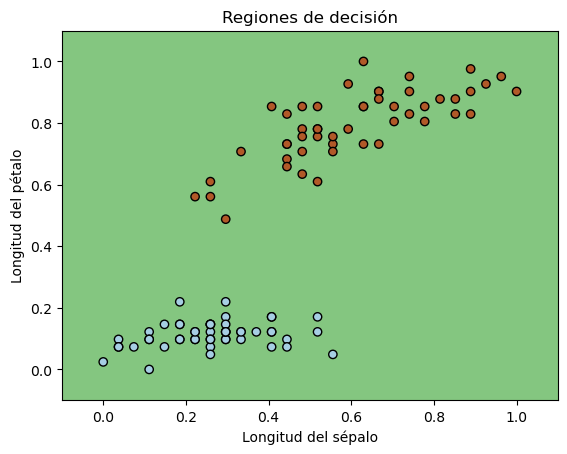

In [112]:
plot_decision_boundary(model, X, Y)

#### 5.

#### Repite los apartados 1-4 esta vez para las variedades versicolor y virgínica. Verás que aunque consiguimos buenos resultados, el modelo está limitado por su linealidad.

#### Respuesta:

- Al usar solo una capa oculta, no puede separar bien zonas más complejas.

- Apartado 1

In [113]:
iris = datasets.load_iris()
X_all = iris.data
y_all = iris.target

mask = (y_all == 1) | (y_all == 2)
X = X_all[mask][:, [0, 2]]
Y = y_all[mask]

# Convertir etiquetas versicolor a 0 y virginica a 1. En caso contrario rompería el modelo.
Y = (Y == 2).astype(int)

# Mezclar y normalizar
X, Y = shuffle(X, Y, random_state=0)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


- Apartado 2

In [114]:
model = keras.Sequential([
    keras.layers.Dense(2, input_shape=(2,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


c:\Users\Eurobeater\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- Apartado 3

In [115]:
model.compile(optimizer='sgd', loss='mean_squared_error')
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

- Apartado 4

In [116]:
model.fit(X, Y, epochs=10, verbose=1)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2519  
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2518 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2514 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2516 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2518 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2517 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2518 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2517 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2516 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2516 


In [117]:
model.fit(X, Y, epochs=100, verbose=1)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2517 
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2515 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2515 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2515 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2515 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2515 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2514 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2516 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2514 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2514 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2513 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2516 
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2514 
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2514 
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2514 
Epoch 16/100
4/4 ━━

In [118]:
# Comentado para que no grafique)
# model.fit(X, Y, epochs=1000, verbose=1)

In [119]:
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, Y):
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    # Con umbral
    Z = (model.predict(grid) > 0.5).astype(int)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors='k')
    plt.xlabel("Longitud del sépalo")
    plt.ylabel("Longitud del pétalo")
    plt.title("Regiones de decisión")
    plt.show()

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 2s 524us/step


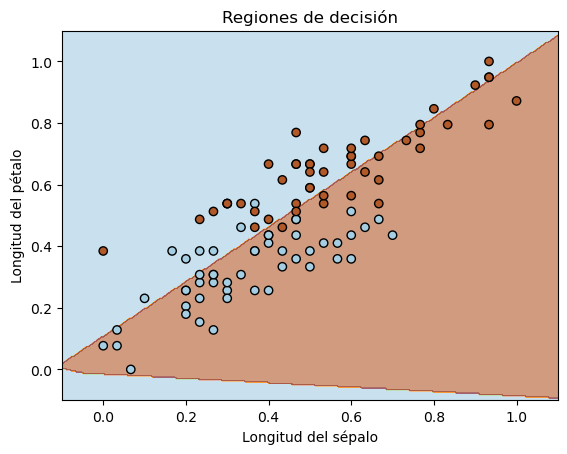

In [120]:
plot_decision_boundary(model, X, Y)

#### 6.
#### Para introducir algo de no linealidad podemos utilizar una función de activación en la primera capa llamada “relu”. Añade el parámetro activation=’relu’ en la primera capa y examina los resultados con la función plot_decision_regions. ¿Han mejorado?

#### Respuesta
- Sí, han mejorado. Se puede ver que la frontera no es una línea recta, adaptándose mejor a los datos.

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2700  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2681 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2701 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2689 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2675 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2647 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2700 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2701 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2702 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2683 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2655 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2679 
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2660 
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2663 
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2678 
Epoch 16/100
4/4 ━

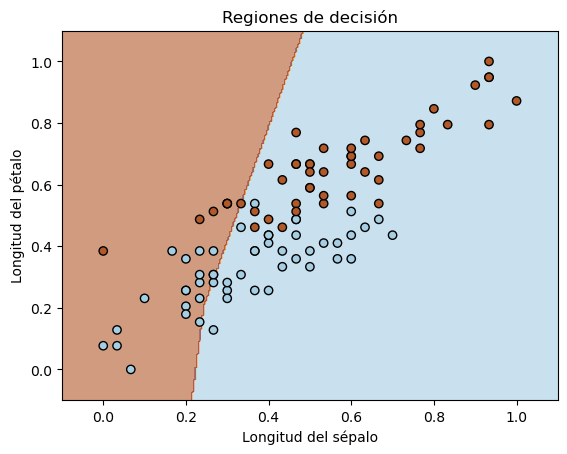

In [126]:
model = keras.Sequential([
    keras.layers.Dense(2, input_shape=(2,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='sgd', loss='mean_squared_error')

model.fit(X, Y, epochs=100)

plot_decision_boundary(model, X, Y)


#### 7.
#### Modifica el modelo de keras añadiendo más capas, y variando las activaciones y número de neuronas experimentando para ver cuál es el mejor resultado que consigues.

#### Respuesta:
- En el primer bloque de código, usé dos capas ocultas con 4 neuronas y otra capa de 3 (ambas con relu) y una capa de salida usando sigmoid.
- En el segundo bloque, probé con 6 neuronas en la primera capa

En los dos modelos se mejora el rendimiento porque se añade más profundidad.

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2426  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2383 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2386 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2387 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2394 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2384 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2415 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2393 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2398 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2403 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2381 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2387 
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2394 
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2393 
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2357 
Epoch 16/100
4/4 ━

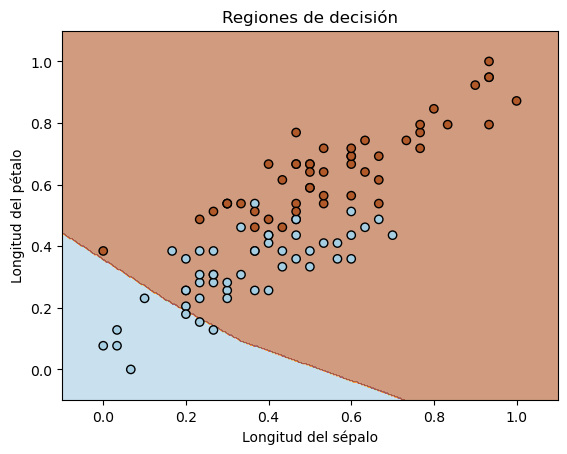

In [129]:
# Se añade una capa oculta (4 neuronas con relu), otra capa oculta (3 neuronas con relu) y una capa de salida con sigmoid.
model = keras.Sequential([
    keras.layers.Dense(4, input_shape=(2,), activation='relu'),
    keras.layers.Dense(3, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(X, Y, epochs=100)
plot_decision_boundary(model, X, Y)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2203  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2170 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2219 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2178 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2192 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2181 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2191 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2170 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2143 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2231 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2213 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2217 
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2158 
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2135 
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2226 
Epoch 16/100
4/4 ━

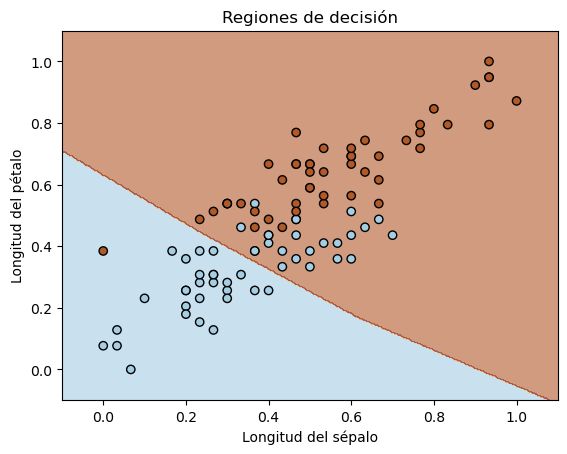

In [131]:
keras.layers.Dense(6, activation='relu'),
keras.layers.Dense(3, activation='relu'),
keras.layers.Dense(1, activation='sigmoid')

model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(X, Y, epochs=100)
plot_decision_boundary(model, X, Y)

#### 8.
#### Ahora vamos a entrenar el modelo para detectar las tres clases de flores (setosa, versicolor y virgínica) con el mismo modelo. Utiliza una RNA con 4 capas de entrada, 4 neuronas en una capa oculta y 3 capas de salida con las 150 muestras. Esta vez, en la compilación del modelo, cambia el optimizador a Adam() que te permitirá jugar con el rango de aprendizaje (lr) y la función de coste a categorical_crossentropy. Por ejemplo:

model.compile(tf.keras.optimizers.Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

#### Nota: Usando sólo longitud de sépalo y pétalo tu modelo debería converger con sgd y mean_square_error (eso si, a veces con muchas épocas). Con 4 neuronas de entrada, optimizador sgd y función de pérdida mean_square_error, verás que estos hiperparámetros hace que la RNA NO CONVERJA. Sin embargo, con Adam y categorical_crossentropy sí que converge en 4 variables. Experimenta también con esta situación.

#### Respuesta:
- El primer modelo converge correctamente. Tiene una precisión del 98%.
- El segundo sin Adam, tiene una precisión del 70%

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

iris = datasets.load_iris()
X = iris.data
Y = to_categorical(iris.target)  # Convertir las clases 0, 1 y 2 en one-hot encoding.
# Normalizar y mezclar
X, Y = shuffle(X, Y, random_state=0)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Usamos 4 entradas, 4 neuronas ocultas, y 3 salidas. Función de activación softmax para clasificación multiclase
model = keras.Sequential([
    keras.layers.Dense(4, input_shape=(4,), activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

# Usando Adam y no sgd
model.compile(optimizer=Adam(learning_rate=0.04), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X, Y, epochs=200, verbose=1)

Epoch 1/200


c:\Users\Eurobeater\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3598 - loss: 1.1756  
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6427 - loss: 1.0093 
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6628 - loss: 0.9008 
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6623 - loss: 0.7890 
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6794 - loss: 0.7140 
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6568 - loss: 0.6521 
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7257 - loss: 0.5524 
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7028 - loss: 0.5000 
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7515 - loss: 0.4828 
Epoch 10/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8303 - loss: 0.4376 
Epoch 11/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8766 - loss: 0.4236 
Epoch 12/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8457 - loss: 0.4222 


In [ ]:
# Código sin usar Adam

model = keras.Sequential([
    keras.layers.Dense(4, input_shape=(4,), activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

model.fit(X, Y, epochs=200, verbose=1)


Epoch 1/200


c:\Users\Eurobeater\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5119 - loss: 0.2216  
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3632 - loss: 0.2183 
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4371 - loss: 0.2212 
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5457 - loss: 0.2206 
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5366 - loss: 0.2209 
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4970 - loss: 0.2194 
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6191 - loss: 0.2197 
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6662 - loss: 0.2192 
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6510 - loss: 0.2189 
Epoch 10/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6740 - loss: 0.2163 
Epoch 11/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4897 - loss: 0.2191 
Epoch 12/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6397 - loss: 0.2195 


#### 9.
#### Añade una capa densa de 16 neuronas con activación “relu” entre la capa de entrada y la capa de salida y repite el proceso de entrenamiento. ¿Observas alguna mejora en la convergencia del modelo?

#### Respuesta:
- Este modelo converge más rapido (alcanza enseguida el 90% de accuracy). Añadir más capacidad al modelo, aprenderá mejor.

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

iris = datasets.load_iris()
X = iris.data
Y = to_categorical(iris.target)

X, Y = shuffle(X, Y, random_state=0)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

model = keras.Sequential([
    keras.layers.Dense(16, input_shape=(4,), activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.04), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X, Y, epochs=200, verbose=1)


Epoch 1/200


c:\Users\Eurobeater\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1782 - loss: 1.1992      
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3498 - loss: 0.9937 
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3894 - loss: 0.9254 
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7616 - loss: 0.8004 
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6480 - loss: 0.6790 
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6958 - loss: 0.5301 
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8754 - loss: 0.4667 
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9047 - loss: 0.4157 
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9005 - loss: 0.3693 
Epoch 10/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8955 - loss: 0.3434 
Epoch 11/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9331 - loss: 0.3145 
Epoch 12/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9282 - loss: 0.28

#### 10.
#### Realiza alguna predicción y comprueba que, efectivamente, la RNA predice correctamente algunas muestras

In [ ]:
# Primera muestra
sample_index = 0
prediction = model.predict(np.array([X[sample_index]]))
predicted_class = np.argmax(prediction)
real_class = np.argmax(Y[sample_index])

print("Predicción:", prediction)
print("Clase predicha:", predicted_class)
print("Clase real:", real_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Muestra 0 → Predicha: 2, Real: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Muestra 1 → Predicha: 1, Real: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Muestra 2 → Predicha: 0, Real: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Muestra 3 → Predicha: 2, Real: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Muestra 4 → Predicha: 0, Real: 0


In [138]:
# Segunda muestra
sample_index = 1
prediction = model.predict(np.array([X[sample_index]]))
predicted_class = np.argmax(prediction)
real_class = np.argmax(Y[sample_index])

print("Predicción:", prediction)
print("Clase predicha:", predicted_class)
print("Clase real:", real_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicción: [[7.0109512e-05 9.9991763e-01 1.2247291e-05]]
Clase predicha: 1
Clase real: 1
